## Neural Network Model

In [1]:
# Import the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data from the data.csv file:
df = pd.read_csv("Classification_train.csv")

In [3]:
# Shuffle the dataframe values
np.random.seed(42)
df_shuffled = df.sample(frac=1).reset_index(drop=True)
df_values = df_shuffled.values

In [4]:
# Split the data into features and target variables:
features = df_values[:, 1:]
target = df_values[:, 0].reshape(-1,1)

In [5]:
m = target.size
n = len(np.unique(target))

In [6]:
y = np.zeros((m,n))
for i in range (n):
    for j in range (m):
        if target[j]==i:
            y[j,i]=1

In [7]:
# Normalize the features:
def min_max_normalization(X):
    min_val = np.min(X, axis=0)
    max_val = np.max(X)
    normalized_X = (X - min_val) / (max_val - min_val)
    return normalized_X

X = min_max_normalization(features)


In [8]:
# Add column of ones for bias term
ones_column = np.ones((X.shape[0], 1))
X = np.concatenate((ones_column, X), axis=1)

In [9]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

In [10]:
# Define the activation function
def relu(x):
    return np.maximum(0, x)

In [11]:
# Define the softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [12]:
input_size = X.shape[1]
hidden_size1 = 128
hidden_size2 = 64
output_size = y.shape[1]

# Initialize weights
W1 = np.random.randn(input_size, hidden_size1)
W2 = np.random.randn(hidden_size1, hidden_size2)
W3 = np.random.randn(hidden_size2, output_size)

In [13]:
# Define the forward propagation function
def forward_propagation(X, W1, W2, W3):
    
    h1 = np.dot(X, W1)
    h1_a = relu(h1)

    h2 = np.dot(h1_a, W2)
    h2_a = relu(h2)
    
    h3 = np.dot(h2_a, W3)
    output = softmax(h3)

    return h1_a, h2_a, output

In [14]:
def backward_propagation(X, y, W1, W2, W3, alpha, itr, lambd):
    m = X.shape[0]
    cost_list=[]

    for i in range(itr):

        # Forward propagation
        h1_a, h2_a, output = forward_propagation(X, W1, W2, W3)

        # Compute Cost (cross-entropy)
        cost = -(np.sum(y * np.log(output + 1e-8))/m) + lambd / (2 * m) * (np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2))
        cost_list.append(cost)

        # Compute gradients
        error = output - y
        d_W3 = (np.dot(h2_a.T, error) + lambd*W3)/m

        d_h2 = np.dot(error, W3.T)
        d_h2[h2_a <= 0] = 0
        d_W2 = (np.dot(h1_a.T, d_h2) + lambd*W2)/m

        d_h1 = np.dot(d_h2, W2.T)
        d_h1[h1_a <= 0] = 0
        d_W1 = (np.dot(X.T, d_h1) + lambd*W1)/m

        # update weights and biases
        W1 -= alpha * d_W1
        W2 -= alpha * d_W2
        W3 -= alpha * d_W3
        
        # print the cost
        if (i+1)%100==0 or i==0:
            print("Itr",i+1,": Cost =", cost)

    return cost_list

In [15]:
iterations = 3000
learning_rate = 0.09
lambd = 1000
cost_list = backward_propagation(X_train, y_train, W1=W1, W2=W2, W3=W3, alpha=learning_rate, itr=iterations, lambd=lambd)

Itr 1 : Cost = 2290.0937618674943
Itr 100 : Cost = 1078.1186015522856
Itr 200 : Cost = 508.6699725767126
Itr 300 : Cost = 240.08292583604515
Itr 400 : Cost = 113.55190075984248
Itr 500 : Cost = 53.9988985827147
Itr 600 : Cost = 25.97861697688913
Itr 700 : Cost = 12.800295346719265
Itr 800 : Cost = 6.603291695512291
Itr 900 : Cost = 3.688007771312088
Itr 1000 : Cost = 2.315183624571353
Itr 1100 : Cost = 1.6670117252187913
Itr 1200 : Cost = 1.3597527466256096
Itr 1300 : Cost = 1.213184779077207
Itr 1400 : Cost = 1.1425542628286383
Itr 1500 : Cost = 1.1079281415081617
Itr 1600 : Cost = 1.09046482502222
Itr 1700 : Cost = 1.081266156689835
Itr 1800 : Cost = 1.0760977558363511
Itr 1900 : Cost = 1.0729281907995323
Itr 2000 : Cost = 1.0708122588984572
Itr 2100 : Cost = 1.0693145822598102
Itr 2200 : Cost = 1.0681815803978147
Itr 2300 : Cost = 1.0672808085697099
Itr 2400 : Cost = 1.0665292523925511
Itr 2500 : Cost = 1.0658734241885057
Itr 2600 : Cost = 1.0652820137419874
Itr 2700 : Cost = 1.0647

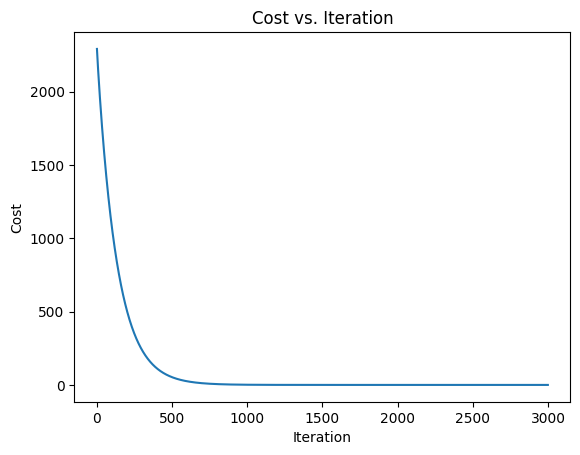

In [16]:
# Graph: Cost vs Iteration
plt.plot(range(iterations), cost_list)
plt.title('Cost vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [17]:
train_pred = forward_propagation(X_val, W1, W2, W3)
y_train_pred = train_pred[2]
predictions = np.argmax(y_train_pred, axis=1)

accuracy = np.mean(predictions == np.argmax(y_val, axis=1))
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 93.33%


In [18]:
# Loading Test data
test = pd.read_csv("Classification_test.csv")

# Extracting features and target variable
test=test.values
features_test = test[:, 1:]

# Normalisation
X_test = min_max_normalization(features_test)
ones_column = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((ones_column, X_test), axis=1)

In [19]:
# Predicting Values on Test Data
pred = forward_propagation(X_test, W1, W2, W3)
y_pred = pred[2]
y_test_pred = np.argmax(y_pred, axis=1)

y_test_pred.reshape(-1,1)

array([[0],
       [4],
       [5],
       ...,
       [0],
       [8],
       [5]], dtype=int64)

In [23]:
column_names = ['target'] + [f'features_{i}' for i in range(1,785)]
Result = pd.DataFrame(data=np.column_stack([y_test_pred, test[:, 1:]]), columns=column_names)
Result
# file_path = "NeuralNetwork_output.csv"
# Result.to_csv(file_path, index=False)

,target,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_775,features_776,features_777,features_778,features_779,features_780,features_781,features_782,features_783,features_784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
